# **Análisis y visualización de datos**
## Actividad 2

## *Situación*
---------------------------------------------------------------------------

<p>
Una vez que se entregó la primera parte del informe, continuás con la
segunda parte, enfocada en los aspectos demográficos y sociales. Los
datos para esta sección no están completamente listos para analizar,
necesitan preprocesamiento antes de poder construir los gráficos o tablas.
Como sabés, algunas de estas tareas son más prácticas y eficientes
haciéndolas en Python que manualmente (en Excel, por ejemplo).
</p>

## *Requerimientos*
---------------------------------------------------------------------------

<p>
Para realizar esta actividad descargá el archivo ZIP, que encontrarás en la
plataforma al final de este documento.
</p>

<p>
Importante: AI momento de importar los archivos .csv, usando pd.read_csv(),
usar la opción encoding = "latin-1 " para que importe correctamente los
nombres de las provincias con tildes.
</p>

## *Consignas*
---------------------------------------------------------------------------

Como próximo paso, decidís integrar distintas bases de datos que tenés
disponibles. Estas contienen variables demográficas: población, hogares y
viviendas, esperanza de vida y fecundidad.
1. En Jupyter, creá un nuevo
notebook e importó las librerías necesarias, y
luego la base de proyecciones de población por año (en formato .csv) y
las otras (ej. expectativa de vida, fecundidad). Tené en cuenta que
algunas bases contienen datos de varios años y otras tienen únicamente
el año del censo 2010. Hacé los chequeos básicos
(head, describe, etc.).
2. Calculá un campo nuevo, densidad (población/superficie) y usar la
función descrita sobre ese campo nuevo.
3. Identificá si existe algún valor extremo en la densidad de población y
explicó a qué podría deberse esto.

In [7]:
import pandas as pd

In [15]:
poblacion_df= pd.read_csv('poblacion.csv', encoding ='latin1')
poblacion_df

,provincia,anio,poblacion_total,poblacion_varones,poblacion_mujeres
0,Total País,2010,40788453,19940704,20847749
1,Total País,2011,41261490,20180791,21080699
2,Total País,2012,41733271,20420391,21312880
3,Total País,2013,42202935,20659037,21543898
4,Total País,2014,42669500,20896203,21773297
...,...,...,...,...,...
770,Tierra del Fuego,2036,241593,122567,119026
771,Tierra del Fuego,2037,245734,124625,121109
772,Tierra del Fuego,2038,249853,126670,123183
773,Tierra del Fuego,2039,253948,128702,125246


In [16]:
# Chequeo de las primeras filas
print("Primeras filas del DataFrame:")
print(poblacion_df.head())

# Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas:")
print(poblacion_df.describe())

# Tipos de datos y tamaño del DataFrame
print("\nTipos de datos y tamaño del DataFrame:")
print(poblacion_df.info())

# Chequeo de valores nulos
print("\nValores nulos por columna:")
print(poblacion_df.isnull().sum())

Primeras filas del DataFrame:
    provincia  anio  poblacion_total  poblacion_varones  poblacion_mujeres
0  Total País  2010         40788453           19940704           20847749
1  Total País  2011         41261490           20180791           21080699
2  Total País  2012         41733271           20420391           21312880
3  Total País  2013         42202935           20659037           21543898
4  Total País  2014         42669500           20896203           21773297

Estadísticas descriptivas:
              anio  poblacion_total  poblacion_varones  poblacion_mujeres
count   775.000000     7.750000e+02       7.750000e+02       7.750000e+02
mean   2025.000000     3.777746e+06       1.856888e+06       1.920858e+06
std       8.950048     9.560571e+06       4.699604e+06       4.861043e+06
min    2010.000000     1.316610e+05       6.723500e+04       6.442600e+04
25%    2017.000000     5.845510e+05       2.906740e+05       2.934905e+05
50%    2025.000000     1.017731e+06       5.0610

In [17]:
esperanza_de_vida_df= pd.read_csv('esperanza_de_vida.csv', encoding ='latin1')
esperanza_de_vida_df

,provincia,anio,mujeres,varones
0,Buenos Aires,2015,80.22,73.54
1,Buenos Aires,2020,81.34,74.74
2,Buenos Aires,2025,82.32,75.80
3,Buenos Aires,2030,83.20,76.76
4,Buenos Aires,2035,83.98,77.60
...,...,...,...,...
139,Tucumán,2020,81.05,75.11
140,Tucumán,2025,82.11,76.15
141,Tucumán,2030,83.03,77.07
142,Tucumán,2035,83.84,77.88


In [18]:
exportaciones_df= pd.read_csv('exportaciones.csv', encoding ='latin1')
exportaciones_df

,rubro,provincia,anio,value
0,Total,Total País,2005,40386.762
1,Total,Buenos Aires,2005,15626.865
2,Total,Capital Federal,2005,271.295
3,Total,Córdoba,2005,4452.178
4,Total,Entre Ríos,2005,815.341
...,...,...,...,...
1995,Combustibles y energía,San Luis,2020,0
1996,Combustibles y energía,Chaco,2020,0
1997,Combustibles y energía,Corrientes,2020,373.938
1998,Combustibles y energía,Formosa,2020,5.169


In [19]:
hogares_viviendas_df= pd.read_csv('hogares_viviendas_superficie.csv', encoding ='latin1')
hogares_viviendas_df

,provincia_id,provincia,hogares,viviendas_particulares,viviendas_particulares_habitadas,superficie_km2
0,2,Capital Federal,1150134,1423973,1082998,200
1,6,Buenos Aires,4789484,5377786,4425193,307571
2,10,Catamarca,96001,113634,89376,102602
3,14,Córdoba,1031843,1232211,978553,165321
4,18,Corrientes,267797,292644,248844,88199
5,22,Chaco,288422,312602,270133,99633
6,26,Chubut,157166,177985,147176,224686
7,30,Entre Ríos,375121,425591,357250,78781
8,34,Formosa,140303,154458,130134,72066
9,38,Jujuy,174630,195785,154911,53219


In [20]:
df5= pd.read_csv('empleo.csv', encoding ='latin1')
df5

,provincia,anio,mes,empleados_registrados_miles
0,Buenos Aires,2009,ene-09,1787.640
1,Buenos Aires,2009,feb-09,1769.223
2,Buenos Aires,2009,mar-09,1745.913
3,Buenos Aires,2009,abr-09,1729.917
4,Buenos Aires,2009,may-09,1723.218
...,...,...,...,...
3691,Tucumán,2021,jun-21,172.053
3692,Tucumán,2021,jul-21,172.030
3693,Tucumán,2021,ago-21,171.015
3694,Tucumán,2021,sep-21,168.084


In [23]:
merged_df = pd.merge(poblacion_df, hogares_viviendas_df, on='provincia')

merged_df['densidad_poblacion'] = merged_df['poblacion_total'] / merged_df['superficie_km2']

print(merged_df.head())

         provincia  anio  poblacion_total  poblacion_varones  \
0  Capital Federal  2010          3028481            1405566   
1  Capital Federal  2011          3033639            1409835   
2  Capital Federal  2012          3038860            1414105   
3  Capital Federal  2013          3044076            1418339   
4  Capital Federal  2014          3049229            1422507   

   poblacion_mujeres  provincia_id  hogares  viviendas_particulares  \
0            1622915             2  1150134                 1423973   
1            1623804             2  1150134                 1423973   
2            1624755             2  1150134                 1423973   
3            1625737             2  1150134                 1423973   
4            1626722             2  1150134                 1423973   

   viviendas_particulares_habitadas  superficie_km2  densidad_poblacion  
0                           1082998             200           15142.405  
1                           1082998     

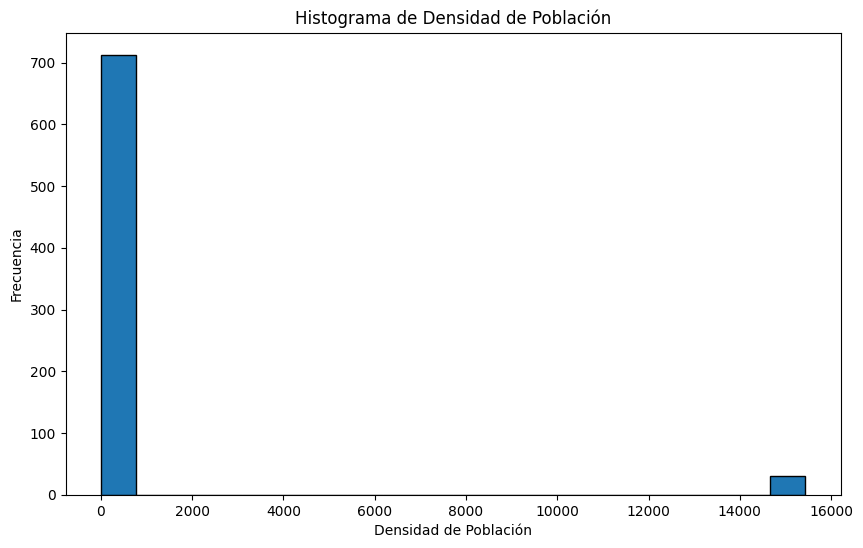

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(merged_df['densidad_poblacion'], bins=20, edgecolor='k')
plt.title('Histograma de Densidad de Población')
plt.xlabel('Densidad de Población')
plt.ylabel('Frecuencia')
plt.show()